In [26]:
import os

import pandas as pd
import itertools
import altair as alt
import seaborn as sns
from IPython.core.display_functions import display
from kmodes.kmodes import KModes
pd.options.mode.chained_assignment = None  # default='warn'
from scipy.stats import chi2_contingency

# Load Data



In [2]:
data = pd.read_csv("G2_ User Interview - Final - User Interviews.csv", index_col="name")
data

,interviewer,Q age,age ranks,"Q background: work / study, relationship",Q place of living,place of living,Q do you shop online?,online shopping,Q why online shopping?,why online shopping,...,apps - bad experinces,Q Do you read all the information provided to you in a museum?\n[yes/no],Q Why?\n[pain point / added value],Q Do you inform yourself about the content of the exhibition in advance?\n[yes/no],inform in advance,Q inform in advance - why? [motivation],Q do you have any suggestion for the App?\nWhat do you wish to have or need?,suggestions,Unnamed: 57,Unnamed: 58
name,,,,,,,,,,,,,,,,,,,,,
Sabine,Ina,54,>40,"Draftswers, Industrial clerk\nmarried","Bad Bentheim, GER",abroad,"selten, wenn dann Lebensmittel, Festival & Mus...",Yes,I live in a town. Supermarket is around the co...,convenience,...,no,no,Wenn ich alles lesen würde würde das viel zu l...,yes,yes,"--> Ich wohne auf dem Land, da gibts nicht so ...",NaN,NaN,NaN,NaN
Jenny,Ina,30,21-30,"Graphic Designer, Freelancer,\nin a relationship","from Salzburg, lives in Vienna, AT",Vienna based,yes,Yes,It's just easy sometimes.,convenience,...,yes,no,"No, because it simply takes too long. Just the...",yes,yes,To make sure whether I like it or not.,I would book more often online even if they wo...,audio guides,NaN,NaN
Britta,Ina,33,31-40,"studied Interior Architecture, Design & Produk...","from Niederrhein, lives in Bayern, GER",abroad,yes,Yes,NaN,NaN,...,no,no,because its always way too much text. She trie...,yes,yes,Regarding where and what is going on but she i...,"Show nishes (not only the biggest museums),\nt...","favorits/filters, map",NaN,NaN
Lisa,Ina,29,21-30,"Master, working as Retail Marketing Manager\ni...","from Bad Bentheim, living in Hamburg, GER",abroad,yes,Yes,NaN,NaN,...,yes,no,I only read what really interests me. Everythi...,yes,yes,I am always checking what to expect. to get so...,App should be short and have a good overview a...,NaN,NaN,NaN
Jaqueline,Ina,25,21-30,Master Restaurierung / Konservierung für Papie...,"from Salzburg, lives in Vienna, AT",Vienna based,yes,Yes,Nice to ly in bed and to not need to go outsid...,convenience,...,no,mostly not,Because of my backround I know a lot already.\...,I will read what the exhibit is about online a...,yes,NaN,A Map would be nice to estimate whether you ca...,map,NaN,NaN
Cristina,Christine,38,31-40,studied history\nProduct manager in payment in...,"Romanian, living in Vienna for 10+ years",Vienna based,yes,Yes,to buy clothes & books,NaN,...,NaN,no,no; especially if it's busy\n\nI always read t...,"no, I read details on the spot, I don't like t...",no,"I read details on the spot, I don't like to sp...",Would you consider an app that's a hub for mus...,NaN,NaN,NaN
Stephan,Christine,28,21-30,"studied political science, history, currently ...","Austrian, living in Vienna",Vienna based,yes,Yes,NaN,NaN,...,NaN,no,only reads the main attractions and what inter...,no,no,NaN,NaN,NaN,NaN,NaN
Petra,Christine,59,>40,"grammar school teacher\nmarried, 3 kids","Austrian, living in Vienna",Vienna based,yes,Yes,"more comfortable in some cases (dog food, heav...","convenience, time",...,NaN,no,techn.: read to children if not too difficult\...,no,NaN,"no prior research, bc. lack of time\n\nusually...",NaN,NaN,NaN,NaN
Matic,Ziga,29,21-30,"Law, Single",Slovenia,abroad,Yes,Yes,I don't like going to the store.\nFast search\...,"time, overview, convenience",...,NaN,Yes!\n,"Of course, I read all the information.","Yes, I always do the prior research.",yes,Because I want to know the context really well.,Filter,filter,NaN,NaN


In [3]:
tags = data.drop([c for c in data.columns if c.startswith("Q") or c.startswith("Unnamed") or c == "vistits ranks"] , axis=1)
tags.columns

Index(['interviewer', 'age ranks', 'place of living', 'online shopping',
       'why online shopping', 'display size', 'display - motives',
       'visits museum', 'motives for museum visit',
       'motivation for museum visit', 'vistits per year', 'kind of interrest',
       'popularity', 'company', 'motives for company', 'information mode',
       'information type', 'information challenges', 'would use app',
       'ticket purchase', 'ticket purchase - motivation', 'uses app website',
       'app used now', 'apps - bad experinces', 'inform in advance',
       'suggestions'],
      dtype='object')

In [4]:
def clean(x):
    if type(x) == list:
        return x[0]

    if pd.isna(x):
        return ""

    if pd.api.types.is_numeric_dtype(x):
        return x

    l = x.split(",")
    l = [i.strip() for i in l]
    l = sorted(l)
    s = ", ".join(l)
    return s.lower()

for column in tags:
    if pd.api.types.is_string_dtype(tags[column]):
        tags[column] = tags[column].apply(clean)

# Pairwise correlations of tag categories

The heatmap shows the p-values of chi-squared test for the contingency tables of all pairwhise combinations

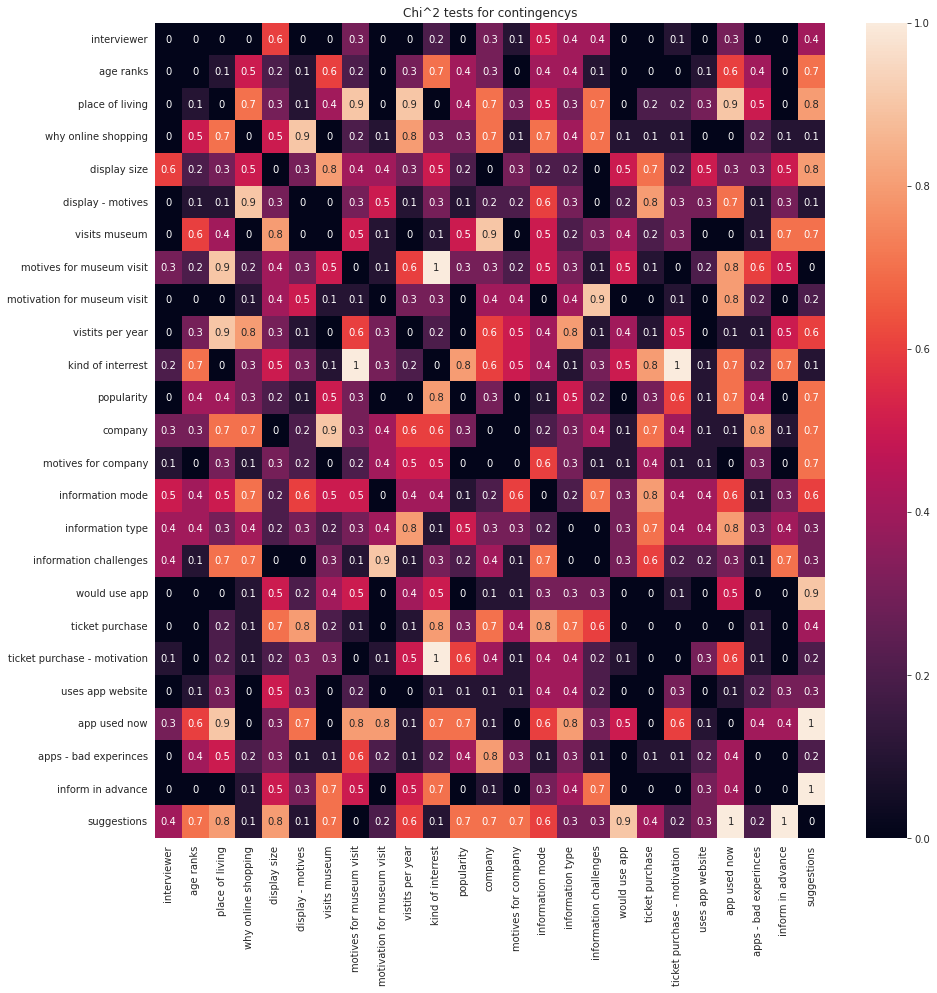

In [5]:
tags = tags.drop(columns=["online shopping"])

combinations = itertools.combinations(list(tags.columns), 2)
correlations = pd.DataFrame(0, index=tags.columns, columns=tags.columns)

for i, j in combinations:
    cont = pd.crosstab(tags[i], tags[j])
    try:
        correlations[i][j] = round(chi2_contingency(cont)[1],1)
        correlations[j][i] = round(chi2_contingency(cont)[1],1)

    except ValueError:
        correlations[i][j] = 0


from matplotlib import rcParams

rcParams['figure.figsize'] = 15,15


plot = sns.heatmap(correlations, annot=True).set_title("Chi^2 tests for contingencys")
fig = plot.get_figure()
fig.savefig("chi2_heatmap.png")


In [6]:
tags = tags.drop(columns=["interviewer"])

# K Modes

A clustering Algorithm for categorical Data

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 281.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 281.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 281.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 281.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 281.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 281.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 281.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, it

/home/josmos/.local/share/virtualenvs/cleanclinspire-GyWQaIpZ/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


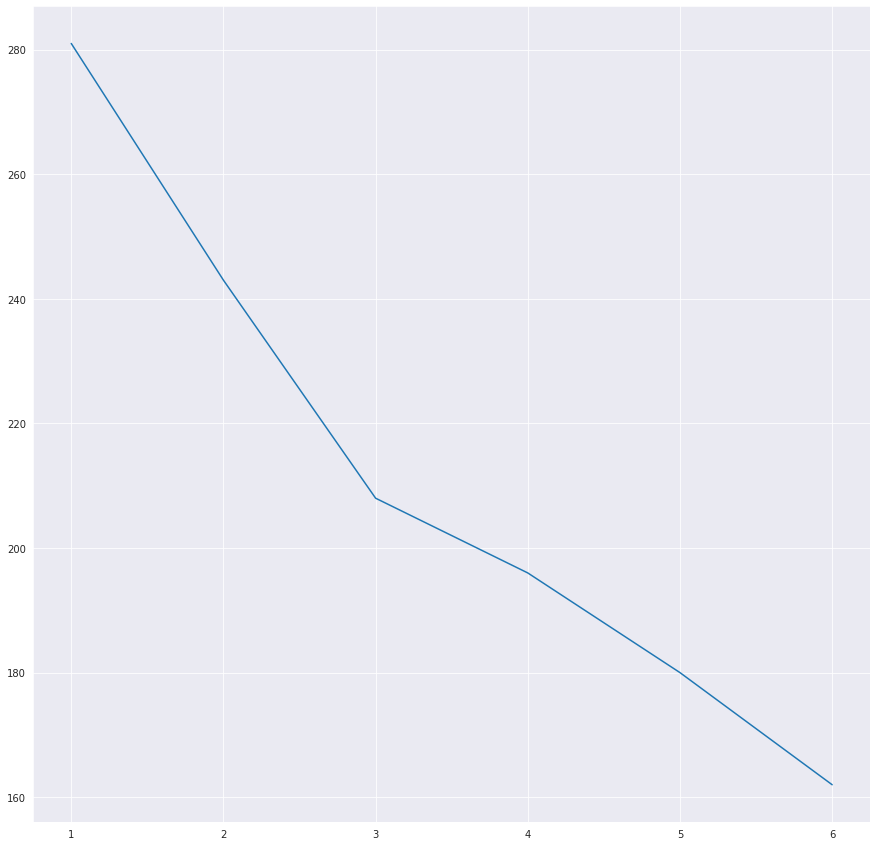

In [7]:
from kmodes.kmodes import KModes
# Elbow curve to find optimal K
cost = []
K = range(1,7)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 7, verbose=1)
    kmode.fit_predict(tags)
    cost.append(kmode.cost_)

plt = sns.lineplot(K, cost)


The Elbow cure allows to identify the ideal number of clusters

In [8]:
# Building the model with 3 clusters
tags_clustered = tags.copy(deep=True)
kmode = KModes(n_clusters=3, init = "random", n_init = 7, verbose=1)
clusters = kmode.fit_predict(tags)
tags_clustered["cluster"] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 220.0
Run 1, iteration: 2/100, moves: 3, cost: 214.0
Run 1, iteration: 3/100, moves: 0, cost: 214.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1, cost: 233.0
Run 2, iteration: 2/100, moves: 0, cost: 233.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4, cost: 230.0
Run 3, iteration: 2/100, moves: 0, cost: 230.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1, cost: 227.0
Run 4, iteration: 2/100, moves: 0, cost: 227.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3, cost: 213.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 2, cost: 244.0
Run

In [9]:
tags

,age ranks,place of living,why online shopping,display size,display - motives,visits museum,motives for museum visit,motivation for museum visit,vistits per year,kind of interrest,...,information type,information challenges,would use app,ticket purchase,ticket purchase - motivation,uses app website,app used now,apps - bad experinces,inform in advance,suggestions
name,,,,,,,,,,,,,,,,,,,,,
Sabine,>40,abroad,convenience,large,ease of use,yes,"creativity, education",intrinsic,4,,...,"billboards, newspaper, social media, word-of-m...",,yes,mostly offline,flexibility,no,,no,yes,
Jenny,21-30,vienna based,convenience,large,"ease of use, mobility",yes,,intrinsic,4,,...,"museum website, other, word-of-mouth",,yes,mostly offline,flexibility,no,,yes,yes,audio guides
Britta,31-40,abroad,,medium,"app optimization, ease of use",yes,"creativity, relaxation",intrinsic,4,,...,google,"no clarity, no clarity, time consuming",yes,offline,"flexibility, time saving",no,,no,yes,"favorits/filters, map"
Lisa,21-30,abroad,,small,"app optimization, mobility",on holidays yes,education,intrinsic,1,history,...,other,no clarity,yes,offline,time saving,yes,google maps,yes,yes,
Jaqueline,21-30,vienna based,convenience,large,"ease of use, mobility",yes,"education, interest",intrinsic,17,"art, history, nature",...,"museum website, other",no clarity,yes,offline,convenience,yes,,no,yes,map
Cristina,31-40,vienna based,,small,,yes,"creativity, education",intrinsic,24,,...,"google, museum website, other, social media, w...",scattered information,yes,"offline, online (price), subscription","collecting instinct, information, price",yes,google\nmuseum app,,no,
Stephan,21-30,vienna based,,large,"ease of use, safety",yes,education,intrinsic,4,,...,"billboards, google, museum website, word-of-mouth",,,,convenience,no,"google, is invited",,no,
Petra,>40,vienna based,"convenience, time",small,,yes,education,extrinsic,2,,...,word-of-mouth,,,,,no,is invited,,,
Matic,21-30,abroad,"convenience, overview, time",small,,,"education, interest",intrinsic,,history,...,"billboards, google, museum website, other",,yes,offline,convenience,,,,yes,filter


# Multiple Correspondence Analysis (MCA)

In [11]:
import prince
mca = prince.MCA(
    n_components=22,
    n_iter=7,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
    )
mca = mca.fit(tags_clustered)
mca.row_coordinates(tags_clustered).index = tags_clustered.index

In [12]:
mca.eigenvalues_


array([0.28238882, 0.23069137, 0.13381221, 0.10564242, 0.0915697 ,
       0.08688237, 0.07675417, 0.06252068, 0.05078141, 0.0488785 ,
       0.04745748, 0.04093447, 0.0356363 , 0.02934662, 0.02668276,
       0.02536528, 0.02160145, 0.0166824 , 0.01014845, 0.00667705,
       0.00161013, 0.        ])

AttributeError: Can only use .str accessor with string values!

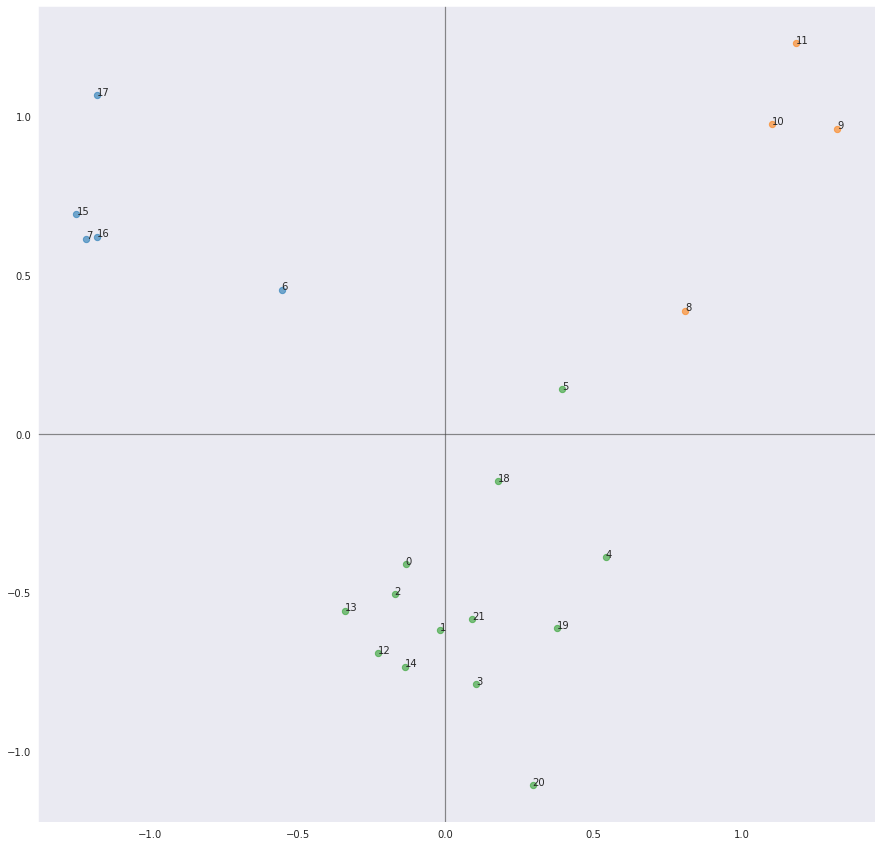

In [13]:
ax = mca.plot_coordinates(
    X=tags_clustered,
    ax=None,
    figsize=(15, 15),
    x_component=0,
    y_component=1,
    show_row_points=True,
    row_points_size=40,
    show_row_labels=True,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=False,
    legend_n_cols=1,
    row_groups=list(tags_clustered["cluster"])
    )
ax.get_figure().savefig('mca_coordinates.svg')

In [ ]:
This plot shows the first and second principal compone

In [ ]:
tags_clustered

In [ ]:
len(tags_clustered["cluster"])

In [ ]:
coords = mca.row_coordinates(tags_clustered)
coords.columns = [col +1 for col in coords.columns]
coords.index = tags_clustered.index

In [ ]:
coords.to_csv("coords.tsv", sep="\t")

In [ ]:
with open("ord.tsv", "w") as fh:
    samples = len(mca.eigenvalues_)
    fh.write(f"Eigvals\t{samples}\n")
    fh.write("\t".join([str(e) for e in mca.eigenvalues_]) + "\n\n")
    fh.write(f"Proportion explained\t{samples}\n")
    fh.write("\t".join([str(e) for e in mca.explained_inertia_]) + "\n\n")
    fh.write("Species\t0\t0\n\n")
    fh.write(f"Site\t{samples}\t{samples}")
    fh.write("\n")
    with open("coords.tsv", "r") as co:
        co.readline()
        cont = co.read()
        fh.write(cont)
    fh.write("\nBiplot\t0\t0\n\nSite constraints\t0\t0")



# 3 Dimensional Visualization and Feature Exploration with Emperor

In [24]:
from emperor import Emperor, nbinstall
from os import makedirs
from os.path import join
from skbio import OrdinationResults
import os

nbinstall()

ordination = OrdinationResults.read('ord.tsv')
output_folder = "plot"
# the remote argument refers to where the support files will be located
# relative to the plot itself i.e. index.html.
emp = Emperor(ordination, tags_clustered, remote=False)
emp
# create an output directory
#makedirs(output_folder, exist_ok=True)

#with open(join(output_folder, 'index.html'), 'w') as f:
#    f.write(emp.make_emperor(standalone=True))
#    emp.copy_support_files(output_folder)



Help on function nbinstall in module emperor.util:

nbinstall(overwrite=False, user=True, prefix=None)
    Copies resources to the '/nbextensions' folder in your IPython directory
    
    This function was taken from [5]_ and modified to match our usecase.
    
    Parameters
    ----------
    overwrite : bool, optional
        If True, always install the files, regardless of what may already be
        installed. Defaults to False.
    user : bool, optional
        Whether to install to the user's .ipython/nbextensions directory.
        Otherwise do a system-wide install
        (e.g. /usr/local/share/jupyter/nbextensions/emperor). Defaults to
        False.
    prefix : str, optional
        Where the files are copied to, by default they are copied to the
        appropriate Jupyter/IPython folder, alternatively it can be a folder
        where the resources are copied to. Note, that if this parameter is set
        `user` has to be `None`.
    
    Raises
    ------
    ArgumentC